In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 로드
ori_df = pd.read_csv('./data/2016.csv', encoding='euc-kr')

In [3]:
ori_df.head(9)

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
5,중부,강간,검거,96.0
6,중부,절도,발생,1204.0
7,중부,절도,검거,485.0
8,중부,폭력,발생,1335.0


In [4]:
# 피벗 테이블을 활용하여 데이터를 재구성한다.
tmp_df = pd.pivot_table(ori_df, 
                        columns=['죄종'],
                        index=['구분'], 
                        values=['건수'])

In [5]:
tmp_df.head(3)

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
강남  304.0  25.0  3.0  1783.5  2216.0
강동  156.0  13.5  4.5  1328.0  2365.5
강북  188.0   4.5  6.5   947.0  2630.0

In [6]:
tmp_df
# 발생 검거가 기본 합산 후 평균으로 바뀌어서 원하는 형태가 되지 않았다.
# 발생과 검거는 데이터의 성격이 다르다.

건수                            
죄종      강간    강도    살인      절도      폭력
구분                                    
강남   304.0  25.0   3.0  1783.5  2216.0
강동   156.0  13.5   4.5  1328.0  2365.5
강북   188.0   4.5   6.5   947.0  2630.0
강서   257.0  10.0   9.5  1511.0  2986.0
관악   293.0  11.0   6.5  1520.0  2971.0
광진   256.5   8.5   4.0  1846.5  2201.5
구로   227.0  11.5   9.0  1385.5  2922.0
금천   159.0   7.0   6.0   959.0  2069.5
남대문   54.5   4.5   1.0   687.5   861.0
노원   150.5   7.5   5.5  1298.5  2320.0
도봉   122.0   5.0   3.0   679.0  1375.0
동대문  174.0  11.0   5.0  1505.5  2509.5
동작   237.0   7.0   7.0   890.0  1552.5
마포   359.5   5.5   4.0  1733.5  2719.5
방배    64.5   4.5   1.0   382.5   473.0
서대문  161.0   4.5   6.5  1127.5  1810.0
서부    51.5   3.0   4.0   585.0  1054.0
서초   285.0   7.0   4.0  1273.5  1710.5
성동    91.0   4.0   4.5  1096.0  1513.5
성북    89.0   3.0   2.0   585.5  1090.0
송파   209.0  13.5   8.5  1795.5  3048.5
수서   160.5  15.5   2.0   969.0  1548.5
양천   119.5   7.0   5.0  1237.0  2084.0
영등포  290.5  16.5  13.0  1640.5  3300.0
용산   232.5   9.5   4.0  1044.0  2196.0
은평    97.5   5.0   2.0   693.0  1432.0
종로   125.0   4.5   2.0   670.5  1213.0
종암    46.5   5.0   1.5   512.0   873.5
중랑   157.0  14.0   7.5  1371.5  2938.0
중부   118.5   3.0   2.0   844.5  1249.5
혜화    82.5   6.0   2.0   683.5   907.0

In [7]:
# 발생 검거 라는 컬럼의 데이터가 발생인놈만 모아서 사본을 받아서 피벗처리
df1 = ori_df[ori_df['발생검거']== '발생']
tmp_df1 = pd.pivot_table(df1, 
              index=['구분'],
              columns=['죄종'],
              values=['건수'])
newCol = {
    '강도':'강도발생',
    '살인':'살인발생',
    '절도':'절도발생',
    '폭력':'폭력발생'
}
tmp_df1.rename(columns=newCol, inplace=True)
tmp_df1.head(10)

건수                           
죄종      강간  강도발생 살인발생    절도발생    폭력발생
구분                                   
강남   339.0  24.0  3.0  2438.0  2336.0
강동   160.0  14.0  4.0  1754.0  2530.0
강북   217.0   5.0  7.0  1222.0  2778.0
강서   275.0  10.0  9.0  1952.0  3204.0
관악   322.0  12.0  6.0  2103.0  3235.0
광진   279.0  11.0  4.0  2636.0  2392.0
구로   273.0  10.0  9.0  1910.0  3164.0
금천   175.0   7.0  6.0  1264.0  2193.0
남대문   57.0   5.0  1.0   946.0   890.0
노원   159.0   6.0  5.0  1857.0  2516.0

In [8]:
# 발생 검거 라는 컬럼의 데이터가 검거인놈만 모아서 사본을 받아서 피벗처리
df2 = ori_df[ori_df['발생검거']== '검거']
tmp_df2 = pd.pivot_table(df2, 
              index=['구분'],
              columns=['죄종'],
              values=['건수'])
# newCol = {
#     '강간':'강간검거',
#     '강도':'강도검거',
#     '살인':'살인검거',
#     '절도':'절도검거',
#     '폭력':'폭력검거'
# }
# tmp_df2.rename(columns=newCol, inplace=True)
tmp_df2.head(10)

건수                            
죄종      강간    강도    살인      절도      폭력
구분                                    
강남   269.0  26.0   3.0  1129.0  2096.0
강동   152.0  13.0   5.0   902.0  2201.0
강북   159.0   4.0   6.0   672.0  2482.0
강서   239.0  10.0  10.0  1070.0  2768.0
관악   264.0  10.0   7.0   937.0  2707.0
광진   234.0   6.0   4.0  1057.0  2011.0
구로   181.0  13.0   9.0   861.0  2680.0
금천   143.0   7.0   6.0   654.0  1946.0
남대문   52.0   4.0   1.0   429.0   832.0
노원   142.0   9.0   6.0   740.0  2124.0

In [9]:
# 데이터 병합(tmp_df1, tmp_df2 병합을 한다.
# 행방향으로 병합
pd.merge(tmp_df1, tmp_df2, on='구분')
# 두개의 데이터가 같은 형태(shape)을 가지고 있다.
tmp = pd.concat([tmp_df1, tmp_df2], axis=1)
tmp

건수                                                               
죄종      강간  강도발생  살인발생    절도발생    폭력발생     강간    강도    살인      절도      폭력
구분                                                                       
강남   339.0  24.0   3.0  2438.0  2336.0  269.0  26.0   3.0  1129.0  2096.0
강동   160.0  14.0   4.0  1754.0  2530.0  152.0  13.0   5.0   902.0  2201.0
강북   217.0   5.0   7.0  1222.0  2778.0  159.0   4.0   6.0   672.0  2482.0
강서   275.0  10.0   9.0  1952.0  3204.0  239.0  10.0  10.0  1070.0  2768.0
관악   322.0  12.0   6.0  2103.0  3235.0  264.0  10.0   7.0   937.0  2707.0
광진   279.0  11.0   4.0  2636.0  2392.0  234.0   6.0   4.0  1057.0  2011.0
구로   273.0  10.0   9.0  1910.0  3164.0  181.0  13.0   9.0   861.0  2680.0
금천   175.0   7.0   6.0  1264.0  2193.0  143.0   7.0   6.0   654.0  1946.0
남대문   57.0   5.0   1.0   946.0   890.0   52.0   4.0   1.0   429.0   832.0
노원   159.0   6.0   5.0  1857.0  2516.0  142.0   9.0   6.0   740.0  2124.0
도봉   123.0   5.0   3.0   866.0  1441.0  121.0   5.0   3.0   492.0  1309.0
동대문  190.0  10.0   5.0  1940.0  2642.0  158.0  12.0   5.0  1071.0  2377.0
동작   325.0   7.0   8.0  1226.0  1661.0  149.0   7.0   6.0   554.0  1444.0
마포   399.0   4.0   4.0  2527.0  2939.0  320.0   7.0   4.0   940.0  2500.0
방배    78.0   4.0   1.0   472.0   500.0   51.0   5.0   1.0   293.0   446.0
서대문  175.0   5.0   6.0  1503.0  1976.0  147.0   4.0   7.0   752.0  1644.0
서부    54.0   4.0   4.0   781.0  1128.0   49.0   2.0   4.0   389.0   980.0
서초   350.0   9.0   4.0  1733.0  1838.0  220.0   5.0   4.0   814.0  1583.0
성동   104.0   3.0   4.0  1296.0  1619.0   78.0   5.0   5.0   896.0  1408.0
성북   103.0   3.0   2.0   790.0  1176.0   75.0   3.0   2.0   381.0  1004.0
송파   234.0  15.0   9.0  2543.0  3289.0  184.0  12.0   8.0  1048.0  2808.0
수서   177.0  15.0   2.0  1149.0  1666.0  144.0  16.0   2.0   789.0  1431.0
양천   131.0   7.0   5.0  1719.0  2250.0  108.0   7.0   5.0   755.0  1918.0
영등포  356.0  19.0  13.0  2341.0  3593.0  225.0  14.0  13.0   940.0  3007.0
용산   251.0   9.0   4.0  1489.0  2384.0  214.0  10.0   4.0   599.0  2008.0
은평   102.0   5.0   2.0   885.0  1536.0   93.0   5.0   2.0   501.0  1328.0
종로   137.0   6.0   4.0   952.0  1291.0  113.0   3.0   0.0   389.0  1135.0
종암    51.0   5.0   2.0   680.0   932.0   42.0   5.0   1.0   344.0   815.0
중랑   164.0  14.0   8.0  1691.0  3164.0  150.0  14.0   7.0  1052.0  2712.0
중부   141.0   3.0   2.0  1204.0  1335.0   96.0   3.0   2.0   485.0  1164.0
혜화   101.0   6.0   2.0   988.0   972.0   64.0   6.0   2.0   379.0   842.0

In [10]:
# pandas 데이터프레임의 값 파트 변경작업
tmp = tmp.astype(np.int)
tmp

건수                                               
죄종    강간 강도발생 살인발생  절도발생  폭력발생   강간  강도  살인    절도    폭력
구분                                                     
강남   339   24    3  2438  2336  269  26   3  1129  2096
강동   160   14    4  1754  2530  152  13   5   902  2201
강북   217    5    7  1222  2778  159   4   6   672  2482
강서   275   10    9  1952  3204  239  10  10  1070  2768
관악   322   12    6  2103  3235  264  10   7   937  2707
광진   279   11    4  2636  2392  234   6   4  1057  2011
구로   273   10    9  1910  3164  181  13   9   861  2680
금천   175    7    6  1264  2193  143   7   6   654  1946
남대문   57    5    1   946   890   52   4   1   429   832
노원   159    6    5  1857  2516  142   9   6   740  2124
도봉   123    5    3   866  1441  121   5   3   492  1309
동대문  190   10    5  1940  2642  158  12   5  1071  2377
동작   325    7    8  1226  1661  149   7   6   554  1444
마포   399    4    4  2527  2939  320   7   4   940  2500
방배    78    4    1   472   500   51   5   1   293   446
서대문  175    5    6  1503  1976  147   4   7   752  1644
서부    54    4    4   781  1128   49   2   4   389   980
서초   350    9    4  1733  1838  220   5   4   814  1583
성동   104    3    4  1296  1619   78   5   5   896  1408
성북   103    3    2   790  1176   75   3   2   381  1004
송파   234   15    9  2543  3289  184  12   8  1048  2808
수서   177   15    2  1149  1666  144  16   2   789  1431
양천   131    7    5  1719  2250  108   7   5   755  1918
영등포  356   19   13  2341  3593  225  14  13   940  3007
용산   251    9    4  1489  2384  214  10   4   599  2008
은평   102    5    2   885  1536   93   5   2   501  1328
종로   137    6    4   952  1291  113   3   0   389  1135
종암    51    5    2   680   932   42   5   1   344   815
중랑   164   14    8  1691  3164  150  14   7  1052  2712
중부   141    3    2  1204  1335   96   3   2   485  1164
혜화   101    6    2   988   972   64   6   2   379   842

In [11]:
#컬럼명 변경
#병합전에 수정 처리
newCol = {
    '강간':'강간검거',
    '강도':'강도검거',
    '살인':'살인검거',
    '절도':'절도검거',
    '폭력':'폭력검거'
}
tmp.rename(columns=newCol, inplace=True)

In [12]:
tmp.to_csv('./data/2016_start.csv', sep = ',' , encoding = 'euc-kr') # 최초가 euc-kr이다보니 저장 와중에 깨질수가 있다.

In [13]:
# 특정 행부터 데이터를 가져온다.
crime_per_police = pd.read_csv('./data/2016_start.csv', encoding = 'euc-kr', header=1)
crime_per_police.head(3)
#열 떨구기 del, 행 떨구기 drop (근데 방향 조정 가능)
crime_per_police.drop(axis = 1, index = [0], inplace=True)

In [14]:
# 특정 칼럼을 인덱스로 설정
crime_per_police.set_index('죄종', inplace = True)
crime_per_police.head(2)

,강간검거,강도발생,살인발생,절도발생,폭력발생,강간검거.1,강도검거,살인검거,절도검거,폭력검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [15]:
# 타입 보정
crime_per_police.astype(np.int32, inplace = True)

,강간검거,강도발생,살인발생,절도발생,폭력발생,강간검거.1,강도검거,살인검거,절도검거,폭력검거
죄종,,,,,,,,,,
강남,339,24,3,2438,2336,269,26,3,1129,2096
강동,160,14,4,1754,2530,152,13,5,902,2201
강북,217,5,7,1222,2778,159,4,6,672,2482
강서,275,10,9,1952,3204,239,10,10,1070,2768
관악,322,12,6,2103,3235,264,10,7,937,2707
광진,279,11,4,2636,2392,234,6,4,1057,2011
구로,273,10,9,1910,3164,181,13,9,861,2680
금천,175,7,6,1264,2193,143,7,6,654,1946
남대문,57,5,1,946,890,52,4,1,429,832


In [16]:
# 주소 (-) gps 값, 지형지물명(-) 주소 및 위치정보 획득 : 지오코더(geocoder)
# kakao API 사용 => 계정 등록 => 앱생성 => 인증키 발급(restful key)
# dev.kakao.com

# 저장의 형태를 좀 더 조정하거나, 아니면 데이터를 읽을 때 조정하거나 해서 2015와 같은 형식 필요

In [17]:
# API를 이용한 http 통신을 통해서 획득
# requests, urllib,beautifulsoup, selenium 등등이 웹 크롤링 기술 대상 모듈
import requests
url = '''https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
'''.format('서울 중부 경찰서')
KAKAO_API_KEY = 'f9bcade751569c67742c3c82a2e2f2af'
headers = {
    'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
}
res = requests.get(url, headers=headers)


In [18]:
res = res.json()
res

{'documents': [{'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서',
   'distance': '',
   'id': '11151738',
   'phone': '182',
   'place_name': '서울중부경찰서',
   'place_url': 'http://place.map.daum.net/11151738',
   'road_address_name': '서울 중구 수표로 27',
   'x': '126.98959193048435',
   'y': '37.563620722687844'},
  {'address_name': '서울 중구 을지로3가 291-50',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서 > 파출소',
   'distance': '',
   'id': '21268201',
   'phone': '02-2266-2404',
   'place_name': '서울중부경찰서 을지로3가파출소',
   'place_url': 'http://place.map.daum.net/21268201',
   'road_address_name': '서울 중구 충무로 56-1',
   'x': '126.99286493571154',
   'y': '37.56620864804315'},
  {'address_name': '서울 중구 을지로5가 72-1',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서 > 지구대',
   'distance': '',
  

In [19]:
res['documents'][0]

{'address_name': '서울 중구 저동2가 62-1',
 'category_group_code': 'PO3',
 'category_group_name': '공공기관',
 'category_name': '사회,공공기관 > 행정기관 > 경찰서',
 'distance': '',
 'id': '11151738',
 'phone': '182',
 'place_name': '서울중부경찰서',
 'place_url': 'http://place.map.daum.net/11151738',
 'road_address_name': '서울 중구 수표로 27',
 'x': '126.98959193048435',
 'y': '37.563620722687844'}

In [20]:
print(res['documents'][0]['address_name'],
res['documents'][0]['y'],
res['documents'][0]['x'],
res['documents'][0]['place_name'])

서울 중구 저동2가 62-1 37.563620722687844 126.98959193048435 서울중부경찰서


### 범죄 통계 데이터에서 관할서에 대한 정보 추출
- 반복작업을 통해 kakao API를 활용하여 주소,위도,경도등 획득

In [21]:
# 반복해서 관할서의 이름을 완성하여 출력(print)하시오.
crime_per_police.index


Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='죄종')

In [22]:
# 검색어를 던져서 응답 데이터중에 주소, 위도, 경도, 질의어 리턴 함수
def netGetGeocoder(query):    
    url = '''https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
    '''.format(query)
    KAKAO_API_KEY = 'f9bcade751569c67742c3c82a2e2f2af'
    headers = {
        'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
    }    
    #API 쿼리 수행
    res = requests.get(url, headers=headers)
    res = res.json()
    # 데이터 추출 : 주소, 위도, 경도, 질의어 순으로 튜플 형태로 리턴
    return res['documents'][0]['address_name'],res['documents'][0]['y'],res['documents'][0]['x'],res['documents'][0]['place_name']
     

In [23]:
# 반복해서 관할서의 이름을 완성하여 출력(print)하시오.
# 진행율
from tqdm import tqdm_notebook

#데이터를 담는 자료형

police_station_info = []

#경찰서 이름 개수만큼 반복
for name in tqdm_notebook(crime_per_police.index):
    #검색어 획득
    query  = '서울 %s 경찰서'%name
    
    police_station_info.append(netGetGeocoder(query))


    
    
    

In [24]:
print(police_station_info)

[('서울 강남구 대치동 998', '37.50938856957773', '127.06707150521913', '서울강남경찰서'), ('서울 강동구 성내동 541-1', '37.528675586086614', '127.12689445192979', '서울강동경찰서'), ('서울 강북구 번동 415-15', '37.63740904254407', '127.02733964805316', '강북경찰서'), ('서울 양천구 신월동 25', '37.539782668110185', '126.82998362436423', '서울강서경찰서 임시청사'), ('서울 관악구 봉천동 1695-5', '37.474588550832955', '126.95106042259249', '서울관악경찰서'), ('서울 광진구 구의동 254-32', '37.5428121811901', '127.08384292223185', '서울광진경찰서'), ('서울 구로구 구로동 436', '37.49488449504183', '126.8866584714525', '서울구로경찰서'), ('서울 관악구 신림동 544', '37.48141868421242', '126.9099695798393', '서울금천경찰서'), ('서울 중구 남대문로5가 561', '37.55497931115527', '126.97350028716411', '서울남대문경찰서'), ('서울 노원구 하계동 250', '37.6423345266253', '127.071404832413', '서울노원경찰서'), ('서울 도봉구 창동 17', '37.65339850283973', '127.05270640425917', '서울도봉경찰서'), ('서울 동대문구 청량리동 229', '37.58508176321097', '127.04576239696928', '서울동대문경찰서'), ('서울 동작구 노량진동 72-35', '37.513147550556226', '126.94285899341229', '서울동작경찰서'), ('서울 마포구 아현동 618-1',

In [25]:
# 위도만 추출해서 리스트로 출력 -> df에 컬럼 삽입을 해야하므로
#리스트 내포
# addrs, lats , lngs, names, 
addrs = [element[0] for element in police_station_info]
lats = [element[1] for element in police_station_info]
lngs = [element[2] for element in police_station_info]
names = [element[3] for element in police_station_info]

In [26]:
crime_per_police.head(2)

,강간검거,강도발생,살인발생,절도발생,폭력발생,강간검거.1,강도검거,살인검거,절도검거,폭력검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [27]:
# crime_per_police 정보에 자치구 정보가 없다. -> 자치구: XX구 데이터 추가 필요
# addrs -> 구를 획득 ->칼럼 추가.
# 
# tmp_gu = []
# for addr in addrs:
#     # 분해 
#     tmp_gu.append(addr.split()[1]))# default blank
#     #print(addr.split(' ')[1])        
#리스트 내포
tmp_gu = [addr.split()[1] for addr in addrs if addr]

In [28]:
crime_per_police['자치구'] = tmp_gu

In [29]:
crime_per_police.head(2)

,강간검거,강도발생,살인발생,절도발생,폭력발생,강간검거.1,강도검거,살인검거,절도검거,폭력검거,자치구
죄종,,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구


In [30]:
# 키 역할을 담당할 자치구 컬럼의 unique 조사
len(crime_per_police['자치구'].unique())
crime_per_police['자치구'].unique()
# 주소에서 자치구를 추출하다 보니 실제 소속 자치구와 일치하지 않는 관할서가 있다. 
# 금천구가 존재하지만 금천 -> 관악구, 금천구로 대체

array(['강남구', '강동구', '강북구', '양천구', '관악구', '광진구', '구로구', '중구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '성동구', '성북구',
       '송파구', '영등포구', '용산구', '종로구', '중랑구'], dtype=object)

In [31]:
# 금천 -> 관악구 =>금천구 대체, 수행
crime_per_police.loc[crime_per_police.index=='금천','자치구'] = '금천구'

# 강서 -> 양천구 => 강서구 대체
crime_per_police.loc[crime_per_police.index=='강서','자치구'] = '강서구'

In [32]:
crime_per_police

,강간검거,강도발생,살인발생,절도발생,폭력발생,강간검거.1,강도검거,살인검거,절도검거,폭력검거,자치구
죄종,,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구
강북,217.0,5.0,7.0,1222.0,2778.0,159.0,4.0,6.0,672.0,2482.0,강북구
강서,275.0,10.0,9.0,1952.0,3204.0,239.0,10.0,10.0,1070.0,2768.0,강서구
관악,322.0,12.0,6.0,2103.0,3235.0,264.0,10.0,7.0,937.0,2707.0,관악구
광진,279.0,11.0,4.0,2636.0,2392.0,234.0,6.0,4.0,1057.0,2011.0,광진구
구로,273.0,10.0,9.0,1910.0,3164.0,181.0,13.0,9.0,861.0,2680.0,구로구
금천,175.0,7.0,6.0,1264.0,2193.0,143.0,7.0,6.0,654.0,1946.0,금천구
남대문,57.0,5.0,1.0,946.0,890.0,52.0,4.0,1.0,429.0,832.0,중구


In [33]:
len(crime_per_police['자치구'].unique())

25

In [34]:
# 데이터저장(crime_analysis_mid_save.csv)
crime_per_police.to_csv('./data/crime_analysis_mid_save.csv', sep = ',', encoding = 'euc-kr')

### 피벗테이블 기능 학습

In [35]:
# 데이터 로드
crime_per_police_raw = pd.read_csv('./data/crime_analysis_mid_save.csv', encoding='euc-kr' )

In [36]:
crime_per_police_raw.head()  # 인덱스가 다시 컬럼으로 돌아옴(csv의 특성.)

,죄종,강간검거,강도발생,살인발생,절도발생,폭력발생,강간검거.1,강도검거,살인검거,절도검거,폭력검거,자치구
0,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구
1,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구
2,강북,217.0,5.0,7.0,1222.0,2778.0,159.0,4.0,6.0,672.0,2482.0,강북구
3,강서,275.0,10.0,9.0,1952.0,3204.0,239.0,10.0,10.0,1070.0,2768.0,강서구
4,관악,322.0,12.0,6.0,2103.0,3235.0,264.0,10.0,7.0,937.0,2707.0,관악구


In [37]:
# 피벗 테이블을 이용하여 구별 관할서 데이터를 합산 (행이 총 25개가 나와야 한다.)
# 자치구 기준
crime_anal = crime_per_police_raw.pivot_table(index='자치구', aggfunc=np.sum)

In [38]:
len(crime_anal.index)

25

In [39]:
crime_anal.head(2)  # 숫자만 집계 되므로 죄종 열은 날라갔다.

,강간검거,강간검거.1,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
자치구,,,,,,,,,,
강남구,516.0,413.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,160.0,152.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0


In [40]:
# 검거율 = 검거/발생*100
# 5대 범죄에 대한 검거율을 각각 추가한다.
crime_anal['폭력검거율'] = crime_anal['폭력검거']/crime_anal['폭력발생']*100
crime_anal['절도검거율'] = crime_anal['절도검거']/crime_anal['절도발생']*100
crime_anal['살인검거율'] = crime_anal['살인검거']/crime_anal['살인발생']*100
crime_anal['강도검거율'] = crime_anal['강도검거']/crime_anal['강도발생']*100
crime_anal['강간검거율'] = crime_anal['강간검거.1']/crime_anal['강간검거']*100
# 검거 컬럼을 모두 제거

In [41]:
crime_anal.head()

,강간검거,강간검거.1,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,,,,,,
강남구,516.0,413.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,88.130935,53.470867,100.000000,107.692308,80.038760
강동구,160.0,152.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,86.996047,51.425314,125.000000,92.857143,95.000000
강북구,217.0,159.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275.0,239.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,86.392010,54.815574,111.111111,100.000000,86.909091
관악구,322.0,264.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,83.678516,44.555397,116.666667,83.333333,81.987578


In [42]:
#검거 제거
del crime_anal['강간검거.1']
del crime_anal['강도검거']
del crime_anal['절도검거']
del crime_anal['살인검거']
del crime_anal['폭력검거']

In [43]:
crime_anal.head()

,강간검거,강도발생,살인발생,절도발생,폭력발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,88.130935,53.470867,100.000000,107.692308,80.038760
강동구,160.0,14.0,4.0,1754.0,2530.0,86.996047,51.425314,125.000000,92.857143,95.000000
강북구,217.0,5.0,7.0,1222.0,2778.0,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275.0,10.0,9.0,1952.0,3204.0,86.392010,54.815574,111.111111,100.000000,86.909091
관악구,322.0,12.0,6.0,2103.0,3235.0,83.678516,44.555397,116.666667,83.333333,81.987578


In [44]:
crime_anal.rename(columns={'강간검거':'강간발생'}, inplace=True)  # 전에 뭔가 잘못함.

In [45]:
# 전년도 데이터가 실수(의도) 들어가 있어서 100을 초과하는 데이터 -> 100 일괄 정리
# 사건 발생 연도와 검거 년도가 달라서 나오는 오류일 수도 있다.
target_col = ['폭력검거율','절도검거율','살인검거율','강도검거율','강간검거율']
tmp = crime_anal[:] # crime_anal.copy()

#연습
for col in target_col:
    # 해당 컬럼의 값이 100이 넘으면  -> True 그행의 컬럼값을 100으로 바꿔라.
    tmp.loc[tmp[col]>100, col] = 100
tmp

,강간발생,강도발생,살인발생,절도발생,폭력발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,160.0,14.0,4.0,1754.0,2530.0,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,217.0,5.0,7.0,1222.0,2778.0,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275.0,10.0,9.0,1952.0,3204.0,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,322.0,12.0,6.0,2103.0,3235.0,83.678516,44.555397,100.000000,83.333333,81.987578
광진구,279.0,11.0,4.0,2636.0,2392.0,84.071906,40.098634,100.000000,54.545455,83.870968
구로구,273.0,10.0,9.0,1910.0,3164.0,84.702908,45.078534,100.000000,100.000000,66.300366
금천구,175.0,7.0,6.0,1264.0,2193.0,88.736890,51.740506,100.000000,100.000000,81.714286
노원구,159.0,6.0,5.0,1857.0,2516.0,84.419714,39.849219,100.000000,100.000000,89.308176


In [46]:
for col in target_col:
    # 해당 컬럼의 값이 100이 넘으면  -> True 그행의 컬럼값을 100으로 바꿔라.
    crime_anal.loc[crime_anal[col]>100, col] = 100
crime_anal.head(20)

,강간발생,강도발생,살인발생,절도발생,폭력발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,160.0,14.0,4.0,1754.0,2530.0,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,217.0,5.0,7.0,1222.0,2778.0,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275.0,10.0,9.0,1952.0,3204.0,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,322.0,12.0,6.0,2103.0,3235.0,83.678516,44.555397,100.000000,83.333333,81.987578
광진구,279.0,11.0,4.0,2636.0,2392.0,84.071906,40.098634,100.000000,54.545455,83.870968
구로구,273.0,10.0,9.0,1910.0,3164.0,84.702908,45.078534,100.000000,100.000000,66.300366
금천구,175.0,7.0,6.0,1264.0,2193.0,88.736890,51.740506,100.000000,100.000000,81.714286
노원구,159.0,6.0,5.0,1857.0,2516.0,84.419714,39.849219,100.000000,100.000000,89.308176


In [47]:
# 컬럼명 변경

crime_anal.rename(columns={'강간발생':'강간', '강도발생':'강도', '살인발생':'살인', '절도발생':'절도', 
                           '폭력발생':'폭력'}, inplace=True)

In [48]:
crime_anal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,160.0,14.0,4.0,1754.0,2530.0,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,217.0,5.0,7.0,1222.0,2778.0,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275.0,10.0,9.0,1952.0,3204.0,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,322.0,12.0,6.0,2103.0,3235.0,83.678516,44.555397,100.000000,83.333333,81.987578


In [49]:
# 데이터 조정 작업
# 살인사건은 5,4 한자리수 // 절도,폭력 4자리수
# 숫자를 같은 범위에 두고 비교하는 것이 명확하고 직관적
# 최대값을 1로 두고 정규화를 진행(nomalize)  진행 ->종합적으로 비교

In [50]:
# 파이썬의 머신러닝 scikit-learn에 있는 전처리 도구를 사용 최대, 최소값을 활용 정규화
from sklearn import preprocessing

In [88]:
# 대상
# crime_anal.columns
col = ['강간', '강도', '살인', '절도', '폭력']
# 대상 컬럼의 데이터 획득
x = crime_anal[col].values
# 전처리 모듈의 최대, 최소 스캐너 함수
min_max_scalar = preprocessing.MinMaxScaler()
# min_max_scalar함수 사용 데이터 받음
x_scaled = min_max_scalar.fit_transform(x)# transform 안에는 원래 float가 들어가야하는데 이미 float임.
x_scaled

array([[1.        , 1.        , 0.2       , 1.        , 1.        ],
       [0.13592233, 0.30555556, 0.1       , 0.32635061, 0.42522452],
       [0.27427184, 0.05555556, 0.4       , 0.13083425, 0.52206169],
       [0.41504854, 0.19444444, 0.6       , 0.39911797, 0.68840297],
       [0.52912621, 0.25      , 0.3       , 0.45461227, 0.70050761],
       [0.42475728, 0.22222222, 0.1       , 0.65049614, 0.37133932],
       [0.41019417, 0.19444444, 0.6       , 0.38368247, 0.67278407],
       [0.1723301 , 0.11111111, 0.3       , 0.14626975, 0.2936353 ],
       [0.13349515, 0.08333333, 0.2       , 0.36420434, 0.41975791],
       [0.0461165 , 0.05555556, 0.        , 0.        , 0.        ],
       [0.20873786, 0.19444444, 0.2       , 0.39470783, 0.46895744],
       [0.53640777, 0.11111111, 0.5       , 0.1323043 , 0.08590394],
       [0.71601942, 0.02777778, 0.1       , 0.61043734, 0.58492776],
       [0.1723301 , 0.05555556, 0.3       , 0.23410511, 0.20890277],
       [0.78640777, 0.27777778, 0.

In [52]:
# 데이터 프레임 생성
crime_anal_normal = pd.DataFrame(x_scaled,columns=col, index=crime_anal.index)
crime_anal_normal.head()

,강간,강도,살인,절도,폭력
자치구,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000
강동구,0.135922,0.305556,0.1,0.326351,0.425225
강북구,0.274272,0.055556,0.4,0.130834,0.522062
강서구,0.415049,0.194444,0.6,0.399118,0.688403
관악구,0.529126,0.250000,0.3,0.454612,0.700508


In [53]:
# 컬럼 추가를 1개가 아닌 5개를 동시에 처리하는 표현
crime_anal_normal[target_col] = crime_anal[target_col]
crime_anal_normal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578


In [54]:
#단순비교를 위해 정규화를 한 것이 아니라 시각화를 위해서 normalization 한거임.

In [55]:
#step1의 결과를 가져오기
f = '../step1_pandas_basic_matplotlib_analysis_csv/data/s_cctv_pop.csv'
result_CCTV = pd.read_csv(f, encoding='utf-8', index_col='자치구')
result_CCTV.head(2)

,cctv 소계,최근 증가율(%),최근 증가율3(%),인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
자치구,,,,,,,,,,,
강남구,3238,150.619195,162.277027,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
강동구,1010,166.490765,210.419727,437050,432749,4301,57680,0.984098,13.197575,0.231095,541.597345


In [56]:
# result_CCTV의 데이터 중 소계와 인구수를 가져와서 crime_anal_normal에 CCTV, 인구수
# 라는 컬럼명으로 데이터를 추가 후 샘플로 상위 2개만 출력하시오.
cols_cctv = ['cctv 소계','인구수'] # CCTV, 인구수
cols_new = ['CCTV','인구수']
crime_anal_normal[cols_new] = result_CCTV[cols_cctv] #개인적으로 for문이 들어가는 연산이라고 생각한다.
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수
자치구,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.0,100.000000,80.03876,3238,551888
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.0,92.857143,95.00000,1010,437050


In [57]:
# crime_anal_normal와 result_CCTV 데이터의 순서가 일치했기 때문에 가능
# 구성은 같은데 순서가 다를 경우엔 merge or 정렬 후 처리

# 순서가 일치 하는지 확인하고 싶어서 양쪽이 모두 같은지 확인하는 간단한 방법이 혹시 있나?

In [58]:
# 발생건수 합산 -> 범죄 추가
# col을 사용
# 해당 컬럼의 값들을 획득 -> 행방향 합산값 ->컬럼 추가
crime_anal_normal['범죄'] = np.sum(crime_anal_normal[col], axis = 1)
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄
자치구,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.0,100.000000,80.03876,3238,551888,4.200000
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.0,92.857143,95.00000,1010,437050,1.293053


In [59]:
# 검거율 총계 => 컬럼명 : 검거율
col_ratio = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_normal['검거율'] = np.sum(crime_anal_normal[col_ratio], axis = 1)

In [60]:
crime_anal_normal.head(10)

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000,421.640561
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053,426.278504
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,1.382723,383.322844
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014,428.116675
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,2.234246,393.554824
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968,878,370519,1.768815,362.586963
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,2.261105,396.081808
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,1.023346,422.191682
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,1.200791,413.577109


### 향상된 시각화 도구
- seaborn
- 칼라맵을 적극적 사용
- pyplot.scatter의 확장 (데이터 간의 성질 비교, 이상 유무를 확인)

In [89]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# 시각화 결과물을 주피터에 내장 시키기 위해 
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [90]:
%matplotlib.inline
crime_anal_normal.columns

UsageError: Line magic function `%matplotlib.inline` not found.


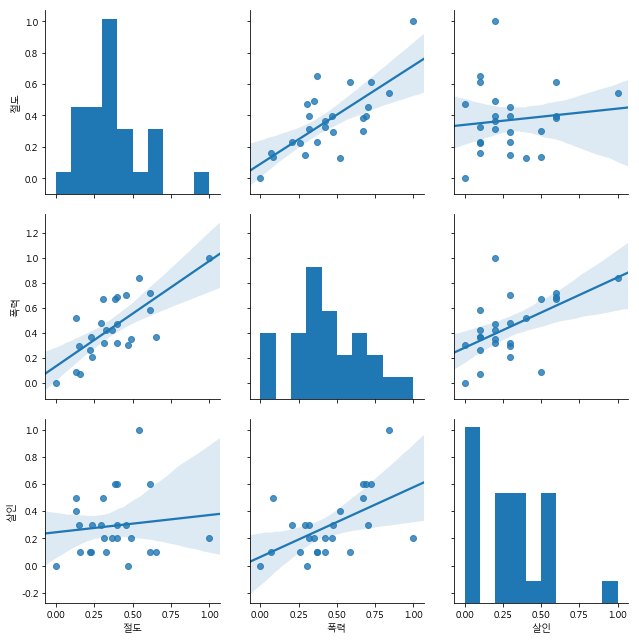

In [91]:
# 산점도를 그려서 변수간 관계성 확인
sns.pairplot(crime_anal_normal, vars=['절도', '폭력', '살인'], kind='reg', size=3)


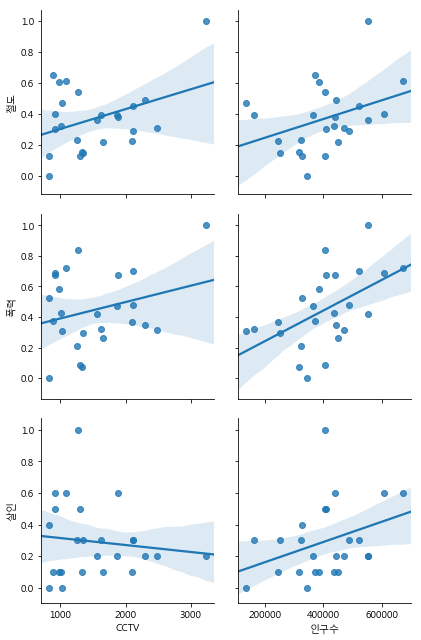

In [92]:
sns.pairplot(crime_anal_normal, x_vars=['CCTV','인구수'], y_vars=['절도', '폭력', '살인'], kind='reg', size=3)
plt.show()

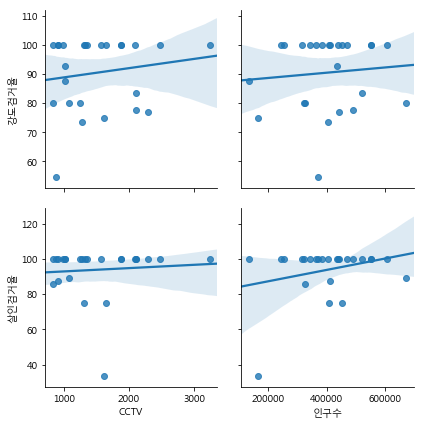

In [93]:
# 100% 데이터 때문에 관계성 파악이 애매하다.
sns.pairplot(crime_anal_normal, x_vars=['CCTV','인구수'], y_vars=['강도검거율', '살인검거율'], kind='reg', size=3)
plt.show()

In [94]:
# 검거율의 최고값을 100이라고 한정하고 나머지 정렬
tmp_max = crime_anal_normal['검거율'].max(0)
crime_anal_normal['검거율'] = crime_anal_normal['검거율'] / tmp_max * 100

In [95]:
# 정렬해서 확인
crime_anal_nomal_sort=crime_anal_normal.sort_values(by='검거율', ascending=False)

In [96]:
target_col

['폭력검거율', '절도검거율', '살인검거율', '강도검거율', '강간검거율']

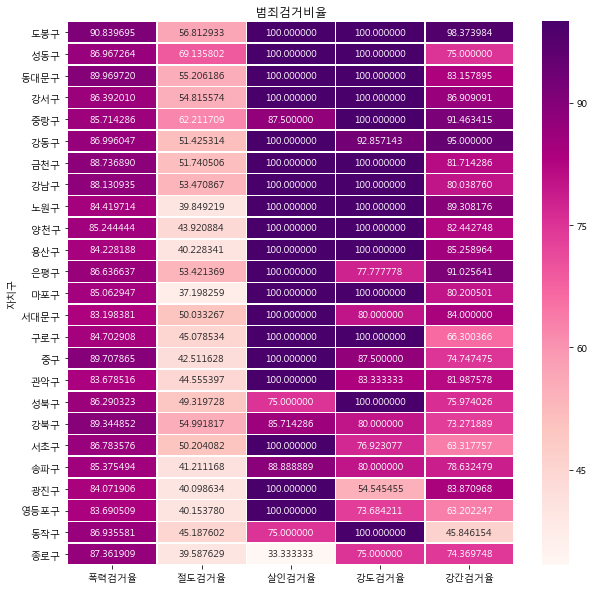

In [97]:
# 검거 기준 정렬 : crime_anal_nomal_sort
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_nomal_sort[target_col],annot=True,fmt='f',linewidths=0.5,cmap='RdPu')
plt.title('범죄검거비율')
plt.show()

In [98]:
# 5대 범죄 발생 통계
col

['강간', '강도', '살인', '절도', '폭력']

In [99]:
# 범죄의 평균값
crime_anal_normal['범죄']=crime_anal_normal['범죄']/5
crime_anal_normal_sort = crime_anal_normal.sort_values(by='범죄',ascending=False)
crime_anal_normal_sort.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,0.168000,94.532602
영등포구,0.611650,0.444444,1.0,0.542080,0.840297,83.690509,40.153780,100.000000,73.684211,63.202247,1277,404501,0.137539,80.876508
송파구,0.315534,0.333333,0.6,0.616318,0.721593,85.375494,41.211168,88.888889,80.000000,78.632479,1081,673161,0.103471,83.875720
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,0.091881,95.984559
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,0.090444,88.802282


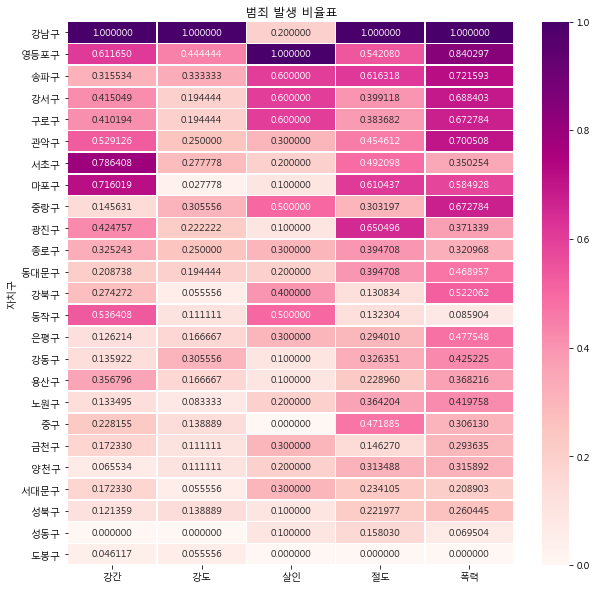

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_normal_sort[col],annot=True,fmt='f',linewidths=0.5,cmap='RdPu')
plt.title('범죄 발생 비율표')
plt.show()

In [101]:
# 데이터 저장
crime_anal_normal.to_csv('./data/crime_mid.csv', sep=',', encoding='euc-kr')
crime_anal_normal_legacy = crime_anal_normal

### 지도 시각화
- folium
- 시군구 gps 경계선 데이터 -> json형태 제공

In [102]:
import json
geo_json = './data/seoul_gu.json'
geo_seoul_gu = json.load(open(geo_json,encoding='utf-8'))
geo_seoul_gu



{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [103]:
import folium

# 자치구별 표시 ->범죄 컬럼 기준 칼라맵 사용


In [104]:
crime_anal_normal = pd.read_csv('./data/crime_mid.csv',encoding='euc-kr')
crime_anal_normal.head()

,자치구,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
0,강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,0.168000,94.532602
1,강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,0.051722,95.572437
2,강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,0.055309,85.941698
3,강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,0.091881,95.984559
4,관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,0.089370,88.235727


In [77]:
map = folium.Map(location=[37.541583, 127.013806],zoom_start=10)
map.choropleth(geo_data=geo_seoul_gu, data=crime_anal_normal, 
               columns=['자치구','범죄'], 
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='자치구별 범죄발생 비율')
map

In [78]:
crime_anal_normal.set_index('자치구',inplace=True)

In [84]:
map = folium.Map(location=[37.541583, 127.013806],zoom_start=10)
map.choropleth(geo_data=geo_seoul_gu, data=crime_anal_normal['범죄'], 
               columns=[crime_anal_normal.index, crime_anal_normal['범죄']],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='자치구별 범죄발생 비율'
              )
map

In [80]:
crime_anal_normal_legacy.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='자치구')

In [81]:
crime_anal_normal.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='자치구')

In [85]:
crime_anal_normal['범죄']

자치구
강남구     0.840000
강동구     0.258611
강북구     0.276545
강서구     0.459403
관악구     0.446849
광진구     0.353763
구로구     0.452221
금천구     0.204669
노원구     0.240158
도봉구     0.020334
동대문구    0.293370
동작구     0.273145
마포구     0.407832
서대문구    0.194179
서초구     0.421308
성동구     0.065507
성북구     0.168534
송파구     0.517356
양천구     0.201205
영등포구    0.687694
용산구     0.244128
은평구     0.272888
종로구     0.318184
중구      0.229012
중랑구     0.385434
Name: 범죄, dtype: float64